<a href="https://colab.research.google.com/github/andrewlee-29/Applied_Deep_Learning_2023Summer/blob/main/Week6_(binary_classification)Training_NNs_ADL_x23_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

This is based on companion notebooks for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

Based on Chollet's notebooks:
- chapter04_getting_started_with_neural_networks
- chapter05_Dropout
- Keras API documentation

# Getting started with neural networks: Classification and regression

## Objectives

- Text preprocessing
    - Encoding/Decoding data to work with a neural network

- Monitoring for overfitting
    - Number of epochs to train to avoid Validation testing performance loss

- Deeper dive into training
    - Early stopping and other callbacks

- Improve Model Generalization
    - Regularization / Dropout

## Classifying movie reviews:

A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

A set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary. This enables us to focus on model building, training, and evaluation.


In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
# only keep the top 10,000 most frequently occurring words in the training data. (out of ~90k)

In [ ]:
print(len(train_data), len(test_data))

25000 25000


## Text preprocessing

The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words).

train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [ ]:
train_data[0][:11] #coded first 11 words of the Review #0

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458]

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data]) #top 10k words

9999

**Decoding reviews back to text**

Words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data.

We can go back and forth between "3" and associated word or vice versa!

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])


In [ ]:
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
train_data[0][:11]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458]

In [ ]:
#decode integers back to words
for i in train_data[0][:11]:
    print(i, reverse_word_index.get(i-3, "?"))

1 ?
14 this
22 film
16 was
43 just
530 brilliant
973 casting
1622 location
1385 scenery
65 story
458 direction


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

Each review is different length. Format is no go as is.



In [ ]:
#Note that length of reviews vary
print("train_data[0]:", len(train_data[0]))
print("train_data[33]:", len(train_data[33]))
print("train_data[333]:", len(train_data[333]))

train_data[0]: 218
train_data[33]: 162
train_data[333]: 114


**Multi-hot encode** your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a Dense layer, capable of handling floating-point vector data, as the first layer in your model.

Note that our train data size is now increased significantly!

In [ ]:
# Multi-hot encode your lists to turn them into vectors of 0s and 1s
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print("train_data:", train_data.shape, "\nx_train:", x_train.shape)

train_data: (25000,) 
x_train: (25000, 10000)


In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

What type of problem are we solving?

(Binary) classification.

Desnse layers with ReLu activation is a good start.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    #final Layer: How many neurons? Which actiations?
    # layers.Dense(####)
    layers.Dense(1,activation="sigmoid")
])

## Activations:

### ReLu:
(rectified linear unit) is a function meant to zero out negative values

<img src=https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-02.png>

### Sigmoid:
A sigmoid “squashes” arbitrary values into the [0, 1] interval (see figure 4.3), outputting something that can be interpreted as a probability.

<img src=https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-03.png>

**Compiling the model**

Dealing with a binary classification problem and the output of your model is a probability (you end your model with a single-unit layer with a sigmoid activation), it’s best to use the binary_crossentropy loss.

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

create a validation set by setting apart 10,000 samples from the original training data.

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

Save traingin **history** while training.

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 101ms/step - loss: 0.5343 - accuracy: 0.7783 - val_loss: 0.4248 - val_accuracy: 0.8387
Epoch 2/20
30/30 [==============================] - 2s 63ms/step - loss: 0.3398 - accuracy: 0.8879 - val_loss: 0.3233 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2541 - accuracy: 0.9144 - val_loss: 0.3100 - val_accuracy: 0.8737
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2065 - accuracy: 0.9306 - val_loss: 0.2917 - val_accuracy: 0.8811
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1729 - accuracy: 0.9440 - val_loss: 0.2807 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1456 - accuracy: 0.9539 - val_loss: 0.2865 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1276 - accuracy: 0.9585 - val_loss: 0.2901 - val_accuracy: 0.8848
Epoch 8/20
3

The *history* dictionary contains four entries: one per metric that was being monitored during training and during validation.

In the following two listings, let’s use Matplotlib to plot the training and validation loss side by side (see figure 4.4), as well as the training and validation accuracy (see figure 4.5).

Note that your own results may vary slightly due to a different random initialization of your model.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                160016    
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


**Plotting the training and validation loss**

Importance of validating your model!

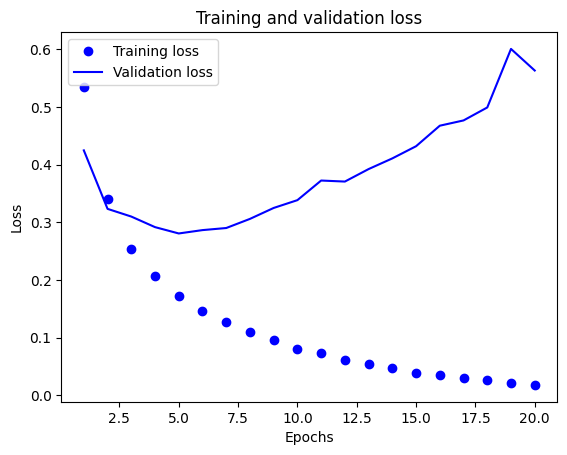

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

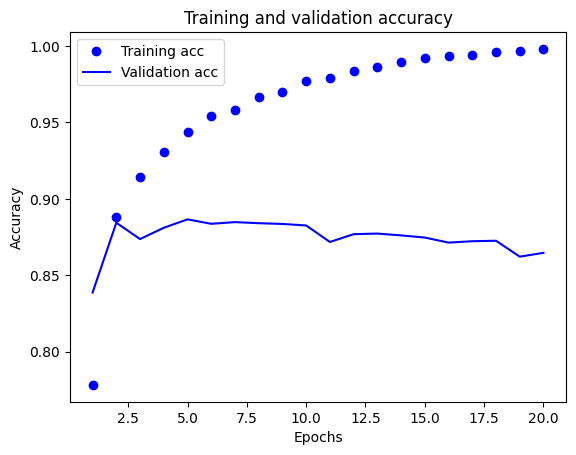

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Monitoring for overfitting


As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient-descent optimization—the quantity you’re trying to minimize should be less with every iteration.

But that isn’t the case for the validation loss and accuracy: they seem to peak at the ***?dort?*** epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before.

In precise terms, what you’re seeing is **overfitting**: after the *???* epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

**Retraining a model from scratch**

In [ ]:
e = 5 #number of epochs to avoid overtraining
# update!!

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=e, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 2s 29ms/step - loss: 0.5564 - accuracy: 0.7589
Epoch 2/5
49/49 [==============================] - 1s 28ms/step - loss: 0.3421 - accuracy: 0.8905
Epoch 3/5
49/49 [==============================] - 2s 35ms/step - loss: 0.2483 - accuracy: 0.9155
Epoch 4/5
49/49 [==============================] - 2s 44ms/step - loss: 0.2089 - accuracy: 0.9266
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.2882 - accuracy: 0.8867


In [ ]:
results

[0.2882428765296936, 0.8867200016975403]

This fairly naive approach achieves an accuracy of 88%.

With state-of-the-art approaches, you should be able to get close to 95%.

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.26652777],
       [0.99986   ],
       [0.8146238 ],
       ...,
       [0.10552192],
       [0.09015525],
       [0.5967048 ]], dtype=float32)

In [ ]:
#FUN!
#Test your  models performance on your own reviews!

def return_review_pred(r, model):
    l = [] #list of each word in r
    for word in r.lower().split(" "):
    # print(word)
        l.append(word_index.get(word)+3)
    l = np.vstack([l,l]) #duct tape
  #encode each word to an int and Multi-hot
    x_r = vectorize_sequences(l)
  # print(x_r.shape) #how long does each sentance become?
    return model.predict(x_r) #What is 0 vs 1?

#Code below should take your review in r and encoded to be analyzed by the model!
r = "This film had the worst cast but okay plot"
return_review_pred(r, model)[0]
#what does 0.6 mean?

1/1 [==============================] - 0s 21ms/step


array([0.26348838], dtype=float32)

### Further experiments

*   You used two representation layers before the final classification layer. Try using one or three representation layers, and see how doing so affects validation and test accuracy.
*   Try using layers with more units or fewer units: 32 units, 64 units, and so on.
*   Try using the mse loss function instead of binary_crossentropy.
*   Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.




## Deeper dive into training

Now that we know what to look for in our train vs validate plots, we can be smarter about it.

Goal:
- Train as long as it avoids overfitting
- No formula
- How to automate?
    - Monitor Loss on Validation data and see when it stops improving.


Since we can save the state of our model, we can code this!


Tool: *callback*


Optional parameter passed to model.fit(_)
Has access to data and state of model
Can:
- Save model at different stages during training
- Interrupt training
- Alter model state, including loading diff weights

Available callbacks:
https://keras.io/api/callbacks/


Common callbacks use cases, from Chollet Ch. 7.3.2:

- **Model checkpointing**—Saving the current state of the model at different points during training.
- **Early stopping**—Interrupting training when the validation loss is no longer improving (and of course, saving the best model obtained during training).
- **Dynamically adjusting** the value of certain parameters during training—Such as the learning rate of the optimizer: [LearningRateScheduler](https://keras.io/api/callbacks/learning_rate_scheduler)
- **Logging** training and validation metrics during training, or visualizing the representations learned by the model as they’re updated—The fit() progress bar that you’re familiar with is in fact a callback!


### How to use callback?

In [ ]:
#Live coding to fill in the blanks.


# Callbacks are passed to the model via the callbacks argument in fit(),
# which takes a list of callbacks.
# You can pass any number of callbacks
callbacks_list = [
    #Interrupts training when improvement stops
    keras.callbacks.EarlyStopping(
        #Monitors the model’s validation accuracy
        monitor = "val_accuracy",
        #Interrupts training when accuracy has stopped improving for N epochs
        patience = 2,
    ),
    #Saves the current weights after every epoch
    keras.callbacks.ModelCheckpoint(
        #Path to the destination model file
        filepath = "checkpoint_path.keras",
        #These two arguments mean you won’t overwrite the model file unless val_loss has improved,
#         which allows you to keep the best model seen during training.
        monitor='val_accuracy',
        mode='max', #optional
        save_best_only=True
)
    #We used model.save() before which saves only AFTER training, not during.
 ]

In [ ]:
# %load callback0.py


Update your training to include your callbacks:

In [ ]:
#Old:
# model.fit(x_train, y_train, epochs=e, batch_size=512)

#New:
#fill with callbacks:
# model.fit( )
e=500
model.fit(x_train, y_train, epochs=e, batch_size=512, callbacks=callbacks_list,validation_data=(x_val, y_val))

Epoch 1/500
49/49 [==============================] - 3s 55ms/step - loss: 0.1665 - accuracy: 0.9400 - val_loss: 0.1427 - val_accuracy: 0.9545
Epoch 2/500
49/49 [==============================] - 2s 36ms/step - loss: 0.1501 - accuracy: 0.9466 - val_loss: 0.1205 - val_accuracy: 0.9646
Epoch 3/500
49/49 [==============================] - 3s 55ms/step - loss: 0.1333 - accuracy: 0.9544 - val_loss: 0.1071 - val_accuracy: 0.9682
Epoch 4/500
49/49 [==============================] - 2s 41ms/step - loss: 0.1222 - accuracy: 0.9586 - val_loss: 0.0959 - val_accuracy: 0.9728
Epoch 5/500
49/49 [==============================] - 2s 36ms/step - loss: 0.1089 - accuracy: 0.9639 - val_loss: 0.0866 - val_accuracy: 0.9761
Epoch 6/500
49/49 [==============================] - 2s 39ms/step - loss: 0.0977 - accuracy: 0.9687 - val_loss: 0.0754 - val_accuracy: 0.9797
Epoch 7/500
49/49 [==============================] - 4s 76ms/step - loss: 0.0902 - accuracy: 0.9708 - val_loss: 0.0708 - val_accuracy: 0.9820
Epoch 

## Improve Model Generalization

- perform better in unseen data
- Regularization

actively *impede* the model’s ability to fit perfectly to the training data, with the goal of making the model perform better during validation.
This is called “regularizing” the model, because it tends to make the model simpler, more “regular,” its curve smoother, more “generic”; thus it is less specific to the training set and better able to generalize by more closely approximating the latent manifold of the data.

Many options, but worthy to mention: Dropout

randomly dropping out (setting to zero) a number of output features of the layer during training.

Controlled by a parameter: **dropout rate**

The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5.

 Add after each layer:

   `layers.Dropout(0.5)`

Good for Dense, but may not be for Conv layers

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5), #50%: we set half of the output randomly to 0 during training
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid") #WHY 1 NEURON???
    #A new output activation! What did we use last time? Why are we using a sigmoid?
])


In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train,
          epochs=20, #lets go crazy
#           callbacks=callbacks_list,
          validation_data=(x_test, y_test),
          batch_size=512)

Epoch 1/20
49/49 [==============================] - 6s 102ms/step - loss: 0.6287 - accuracy: 0.6429 - val_loss: 0.5125 - val_accuracy: 0.8553
Epoch 2/20
49/49 [==============================] - 2s 44ms/step - loss: 0.4902 - accuracy: 0.7915 - val_loss: 0.3868 - val_accuracy: 0.8787
Epoch 3/20
49/49 [==============================] - 3s 67ms/step - loss: 0.3964 - accuracy: 0.8548 - val_loss: 0.3149 - val_accuracy: 0.8869
Epoch 4/20
49/49 [==============================] - 2s 47ms/step - loss: 0.3330 - accuracy: 0.8855 - val_loss: 0.2881 - val_accuracy: 0.8876
Epoch 5/20
49/49 [==============================] - 3s 63ms/step - loss: 0.2885 - accuracy: 0.9030 - val_loss: 0.2797 - val_accuracy: 0.8865
Epoch 6/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2542 - accuracy: 0.9155 - val_loss: 0.2796 - val_accuracy: 0.8852
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2306 - accuracy: 0.9254 - val_loss: 0.2878 - val_accuracy: 0.8845
Epoch 8/20
4

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


**Plotting the training and validation loss**

Importance of validating your model!

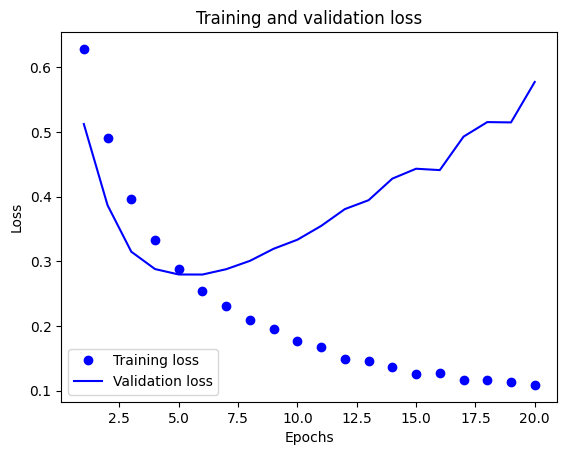

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

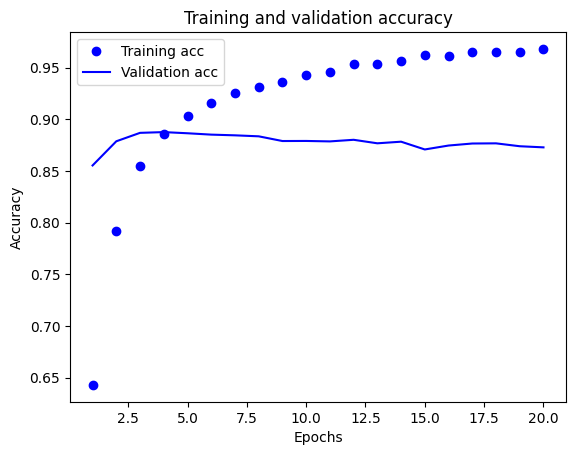

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient-descent optimization—the quantity you’re trying to minimize should be less with every iteration.

But that isn’t the case for the validation loss and accuracy: they seem to peak at the ??? epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before.

In precise terms, what you’re seeing is **overfitting**: after the ??? epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

**Retraining a model from scratch**

In [ ]:
e = 4 #number of epochs to avoid overtraining

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_nod = model.fit(x_train, y_train, epochs=e, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/4
49/49 [==============================] - 4s 75ms/step - loss: 0.4724 - accuracy: 0.8129 - val_loss: 0.3489 - val_accuracy: 0.8765
Epoch 2/4
49/49 [==============================] - 2s 43ms/step - loss: 0.2813 - accuracy: 0.9009 - val_loss: 0.3038 - val_accuracy: 0.8807
Epoch 3/4
49/49 [==============================] - 3s 60ms/step - loss: 0.2199 - accuracy: 0.9209 - val_loss: 0.3231 - val_accuracy: 0.8653
Epoch 4/4
49/49 [==============================] - 2s 48ms/step - loss: 0.1888 - accuracy: 0.9328 - val_loss: 0.3249 - val_accuracy: 0.8686


In [ ]:
# history_nod
history_dict = history.history
h2 = history_nod.history

ValueError: ignored

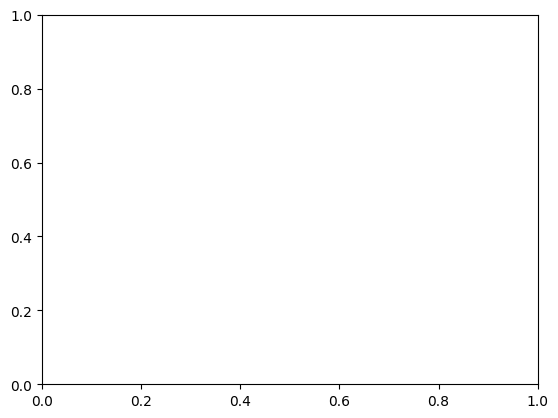

In [ ]:
plt.clf()
acc2 = h2["accuracy"]
val_acc2 = h2["val_accuracy"]
plt.plot(epochs, acc2, "bo", label="Model:DropOut Training acc")
plt.plot(epochs, val_acc2, "b", label="Model:DropOut Validation acc")
plt.plot(epochs, acc, "rx", label="Model:Orig Training acc")
plt.plot(epochs, val_acc, "r-.", label="Model:Orig Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

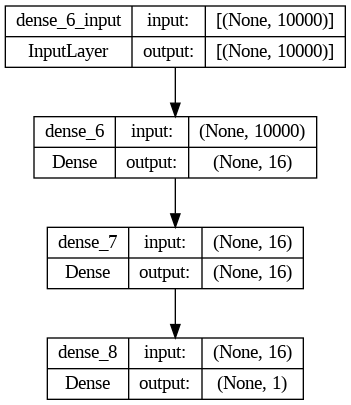

In [ ]:
keras.utils.plot_model(model, "classifier_with_shape_info.png", show_shapes=True)

### Further experiments

*   Try setting dropout rate to values (0, 1)
*   You used two representation layers before the final classification layer. Try using one or three representation layers, and see how doing so affects validation and test accuracy.
*   Try using callbacks

## Summary

- Text preprocessing
    - Encoding/Decoding data to work with a neural network

- Monitoring for overfitting
    - Number of epochs to train to avoid Validation testing performance loss
    - Early stopping and other callbacks

- Improve Model Generalization
    - Regularization via Dropout

## Future work

What else we can do?
- How to feature-ize text data / n-grams
- Sequence modeling with CNN vs RNN/LSTM, transformers